In [ ]:
!wget https://raw.githubusercontent.com/NeilBaner/cs3237-group20-project/main/Deep%20learning%20and%20Datasets/Dumbell_Excercises_data_collector%20/final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ

--2022-11-16 07:56:23--  https://raw.githubusercontent.com/NeilBaner/cs3237-group20-project/main/Deep%20learning%20and%20Datasets/Dumbell_Excercises_data_collector%20/final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1241708 (1.2M) [text/plain]
Saving to: ‘final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ’

final_dumbbell_move 100%[===================>]   1.18M  --.-KB/s    in 0.07s   

2022-11-16 07:56:23 (17.6 MB/s) - ‘final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ’ saved [1241708/1241708]



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import deque

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
os.listdir()

['.config',
 'final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ',
 'Idle_data.csv',
 'final_dumbbell_movement_dataset2.csv',
 'lstm.hd5',
 'sample_data']

In [ ]:
# f = os.listdir()[2]
df_o = pd.read_csv('final_dumbbell_movement_dataset.csv?token=GHSAT0AAAAAABXWSP2HDQ6F67FJQ5UQG55QY3UUWUQ')
df_o.columns[:8]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (28,35,42,49,56,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['gyroscope-x', 'gyroscope-y', 'gyroscope-z', 'accelorometer-x',
       'accelorometer-y', 'accelorometer-z', 'resultant-g', 'label'],
      dtype='object')

In [ ]:
f = os.listdir()[1]
df_i = pd.read_csv('Idle_data.csv', header=None)
df_i.columns = ['gyroscope-x', 'gyroscope-y', 'gyroscope-z', 'accelorometer-x',
       'accelorometer-y', 'accelorometer-z', 'resultant-g', 'label']

In [ ]:
df = pd.concat([df_o, df_i])
df.iloc[10000:11000,:]

,gyroscope-x,gyroscope-y,gyroscope-z,accelorometer-x,accelorometer-y,accelorometer-z,resultant-g,label,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
10000,0.84,-7.73,7.94,0.56,-0.58,1.33,1.56,Dumbbell-Squat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,-9.07,-16.98,10.76,0.56,-0.46,1.31,1.50,Dumbbell-Squat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,-11.64,-5.70,13.45,0.55,-0.35,1.27,1.43,Dumbbell-Squat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,-3.57,-14.65,10.70,0.44,-0.27,1.24,1.35,Dumbbell-Squat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,-5.17,-22.83,14.69,0.42,-0.08,1.28,1.35,Dumbbell-Squat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.02,0.03,-0.02,0.00,0.00,1.00,1.00,Idle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,-0.01,0.04,0.06,0.00,0.00,1.00,1.00,Idle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,-0.01,0.00,-0.01,0.00,0.00,1.00,1.00,Idle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,0.01,0.04,-0.03,0.00,0.00,1.00,1.00,Idle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = {}
for l in df['label'].unique():
    data[l.lower()] = df[df['label'].str.lower() == l.lower()].iloc[:,:7]

In [ ]:
df_xy = df.iloc[:,:8]

In [ ]:
label_dict = {}
for i, l in enumerate(data.keys()):
    label_dict[l] = i
    print(f"{l}: {len(data[l])}")

idle: 6455
bicep-curl: 1618
shoulder-press: 1647
left-shoulder-lateral-raise: 821
right-shoulder-lateral-raise: 783
shoulder-front-raise: 1113
left-hand-tricep-extension: 716
right-hand-tricep-extension: 735
forward-lunge: 2132
dumbbell-squat: 1109


In [ ]:
label_dict

{'idle': 0,
 'bicep-curl': 1,
 'shoulder-press': 2,
 'left-shoulder-lateral-raise': 3,
 'right-shoulder-lateral-raise': 4,
 'shoulder-front-raise': 5,
 'left-hand-tricep-extension': 6,
 'right-hand-tricep-extension': 7,
 'forward-lunge': 8,
 'dumbbell-squat': 9}

#Logistic regression

In [ ]:
X_train = []
Y_train = []
for key in data:
    d = np.array(data[key])
    for i in range(len(d)):
        X_train.append(d[i])
        Y_train.append(label_dict[key])

In [ ]:
X = np.array(X_train)
Y = np.array(Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

# X = np.array(X_train)
# Y = np.array(Y_train)
# reg = LinearRegression().fit(X, Y)
# reg.score(X, Y)

0.6110351117191063

In [ ]:
#index i prediction
i = 3
pipe.predict(X_test[i].reshape(1, -1)), Y_test[i]

(array([2]), 2)

#MLP

In [ ]:
window = 50
slide = 10
data_q = deque(maxlen=window)
X = []
Y = []
for i in range(len(df_xy)):
    data_q.append(df_xy.iloc[i,:])
    if len(data_q) == window and i % slide == 0:
        data = np.asarray(data_q)
        x = data[:,:7]
        scaler = preprocessing.StandardScaler().fit(x)
        x = scaler.transform(x)
        X.append(x)
        l, counts = np.unique(data[:,7], return_counts=True)
        y = np.zeros(len(label_dict))
        y[label_dict[l[np.argmax(counts)].lower()]] = 1
        Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

nn = Sequential()
nn.add(Dense(128, input_shape = (window*7, ), activation = 'relu'))
nn.add(Dense(len(label_dict), activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)

nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = 'accuracy')

X_train = X_train.reshape(-1, window*7)
Y_train = Y_train.reshape(-1, len(label_dict))
X_test = X_test.reshape(-1, window*7)
Y_test = Y_test.reshape(-1, len(label_dict))
mlp_history = nn.fit(X_train, Y_train, shuffle = True, epochs = 50, validation_data = (X_test, Y_test))

Epoch 1/50
43/43 [==============================] - 1s 7ms/step - loss: 1.9963 - accuracy: 0.3697 - val_loss: 1.7862 - val_accuracy: 0.4503
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 1.0562 - accuracy: 0.6969 - val_loss: 1.4274 - val_accuracy: 0.5526
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.8873 - val_loss: 1.1817 - val_accuracy: 0.6433
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.9736 - val_loss: 1.0854 - val_accuracy: 0.6696
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9949 - val_loss: 1.0286 - val_accuracy: 0.6959
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 1.0000 - val_loss: 1.0007 - val_accuracy: 0.7018
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 0.9849 - val_accuracy: 0.7047
Epoch 8/50
43/43 [==

In [ ]:
#index i prediction
i = 3
np.argmax(nn.predict(X_test[i].reshape(-1, window*7))), np.argmax(Y_test[i])

1/1 [==============================] - 0s 56ms/step


(0, 0)

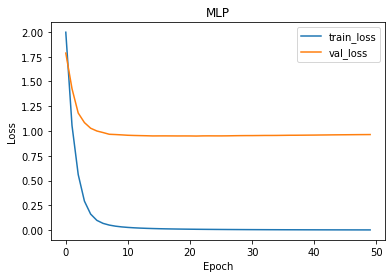

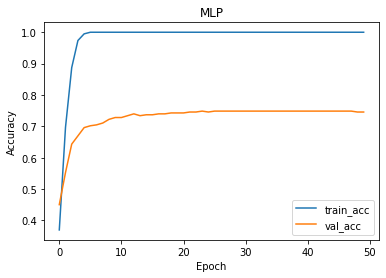

In [ ]:
# visualizing losses and accuracy
train_loss = mlp_history.history['loss']
val_loss   = mlp_history.history['val_loss']
train_acc  = mlp_history.history['accuracy']
val_acc    = mlp_history.history['val_accuracy']
xc         = range(50)

# orange curve is validation
plt.figure()
plt.title('MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.figure()
plt.title('MLP')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.legend(['train_acc', 'val_acc'])
plt.show()

#LSTM

In [ ]:
window = 50
slide = 10
data_q = deque(maxlen=window)
X = []
Y = []
for i in range(len(df_xy)):
    data_q.append(df_xy.iloc[i,:])
    if len(data_q) == window and i % slide == 0:
        data = np.asarray(data_q)
        x = data[:,:7]
        scaler = preprocessing.StandardScaler().fit(x)
        x = scaler.transform(x)
        X.append(x)
        l, counts = np.unique(data[:,7], return_counts=True)
        y = np.zeros(len(label_dict))
        y[label_dict[l[np.argmax(counts)].lower()]] = 1
        Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
len(X), len(df_xy)

(1708, 17129)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(window, 7)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_dict), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# model_name = "lstm.hd5"
# savemodel = ModelCheckpoint(model_name)
# stopmodel = EarlyStopping(min_delta=0.001, patience=1)
lstm_history = model.fit(X_train, Y_train, shuffle = True, epochs = 50, validation_data = (X_test, Y_test))
model.save("lstm.hd5")

Epoch 1/50
43/43 [==============================] - 5s 45ms/step - loss: 2.1726 - accuracy: 0.3111 - val_loss: 2.0342 - val_accuracy: 0.3480
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 1.6946 - accuracy: 0.4187 - val_loss: 1.8114 - val_accuracy: 0.4327
Epoch 3/50
43/43 [==============================] - 1s 28ms/step - loss: 1.4856 - accuracy: 0.4898 - val_loss: 1.4973 - val_accuracy: 0.4649
Epoch 4/50
43/43 [==============================] - 1s 28ms/step - loss: 1.3276 - accuracy: 0.5183 - val_loss: 1.3649 - val_accuracy: 0.4854
Epoch 5/50
43/43 [==============================] - 1s 29ms/step - loss: 1.1080 - accuracy: 0.6025 - val_loss: 1.1245 - val_accuracy: 0.5994
Epoch 6/50
43/43 [==============================] - 1s 28ms/step - loss: 0.8933 - accuracy: 0.6867 - val_loss: 1.0246 - val_accuracy: 0.6608
Epoch 7/50
43/43 [==============================] - 1s 29ms/step - loss: 0.7829 - accuracy: 0.7357 - val_loss: 0.8156 - val_accuracy: 0.7018
Epoch 8/50
43

In [ ]:
#index i prediction
i = 50
np.argmax(model.predict(np.expand_dims(X_test[i], axis=0), verbose=False)), np.argmax(Y_test[i])

(7, 7)

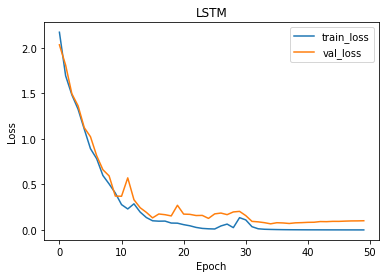

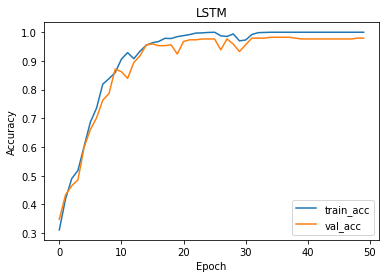

In [ ]:
# visualizing losses and accuracy
train_loss = lstm_history.history['loss']
val_loss   = lstm_history.history['val_loss']
train_acc  = lstm_history.history['accuracy']
val_acc    = lstm_history.history['val_accuracy']
xc         = range(50)

# orange curve is validation
plt.figure()
plt.title('LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.figure()
plt.title('LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [ ]:
!zip -r lstm.hd5.zip lstm.hd5/

  adding: lstm.hd5/ (stored 0%)
  adding: lstm.hd5/keras_metadata.pb (deflated 88%)
  adding: lstm.hd5/assets/ (stored 0%)
  adding: lstm.hd5/variables/ (stored 0%)
  adding: lstm.hd5/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: lstm.hd5/variables/variables.index (deflated 62%)
  adding: lstm.hd5/saved_model.pb (deflated 90%)


In [ ]:
from tensorflow import keras
model = keras.models.load_model('lstm.hd5')

In [ ]:
test_df = pd.read_csv('bicep_curl_data.csv')

In [ ]:
data_q = deque(maxlen=window)
Xt = []
for i in range(len(test_df)):
    data_q.append(test_df.iloc[i,:])
    if len(data_q) == window and i % slide == 0:
        data = np.asarray(data_q)
        x = data[:,:7]
        scaler = preprocessing.StandardScaler().fit(x)
        x = scaler.transform(x)
        Xt.append(x)

In [ ]:
Yt = []
for i in range(len(Xt)):
    yt = np.argmax(model.predict(np.expand_dims(Xt[i], axis=0), verbose=False))
    Yt.append(yt)

In [ ]:
unique, counts = np.unique(Yt, return_counts=True)
for i, u in enumerate(unique):
    for key, value in label_dict.items():
        if u == value:
            print(f"{u} {key}: {counts[i]}")

0 idle: 18
1 upper body: 31
